In [1]:
import numpy as np
from pydbm.nn.simpleautoencoder.repelling_auto_encoder import RepellingAutoEncoder
from pydbm.nn.neural_network import NeuralNetwork as Encoder
from pydbm.nn.neural_network import NeuralNetwork as Decoder
from pydbm.nn.nn_layer import NNLayer as EncoderLayer
from pydbm.nn.nn_layer import NNLayer as DecoderLayer
from pydbm.activation.relu_function import ReLuFunction
from pydbm.activation.tanh_function import TanhFunction
from pydbm.activation.identity_function import IdentityFunction
from pydbm.activation.logistic_function import LogisticFunction
from pydbm.loss.mean_squared_error import MeanSquaredError
from pydbm.optimization.optparams.adam import Adam
from pydbm.synapse.nn_graph import NNGraph as EncoderGraph
from pydbm.synapse.nn_graph import NNGraph as DecoderGraph
from pydbm.verification.verificate_function_approximation import VerificateFunctionApproximation
from pydbm.optimization.batch_norm import BatchNorm

from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("pydbm")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

In [2]:
epochs = 1000
batch_size = 20
dim1 = 500
dim2 = 500
scale = 0.01

In [3]:
encoder_activation_function = TanhFunction()
#encoder_activation_function.batch_norm = BatchNorm()
decoder_activation_function = IdentityFunction()
#decoder_activation_function.batch_norm = BatchNorm()

In [4]:
encoder_layer = EncoderLayer(
    EncoderGraph(
        activation_function=encoder_activation_function,
        hidden_neuron_count=dim1,
        output_neuron_count=dim2,
        scale=scale,
    )
)

opt_params = Adam()
opt_params.dropout_rate = 0.5

encoder = Encoder(
    nn_layer_list=[
        encoder_layer, 
    ],
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=1e-05,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    computable_loss=MeanSquaredError(grad_clip_threshold=10.0),
    opt_params=opt_params,
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=1e-15
)

Setup NN layers and the parameters.


In [5]:
decoder_layer = DecoderLayer(
    DecoderGraph(
        activation_function=decoder_activation_function,
        hidden_neuron_count=dim2,
        output_neuron_count=dim1,
        scale=scale,
    )
)

opt_params = Adam()
opt_params.dropout_rate = 0.5

decoder = Decoder(
    nn_layer_list=[
        decoder_layer, 
    ],
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=1e-05,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    computable_loss=MeanSquaredError(grad_clip_threshold=10.0),
    opt_params=opt_params,
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=1e-15
)

Setup NN layers and the parameters.


In [6]:
auto_encoder = RepellingAutoEncoder(
    encoder=encoder,
    decoder=decoder,
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=1e-01,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    computable_loss=MeanSquaredError(grad_clip_threshold=1e+10),
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=1e-15
)

Setup NN layers and the parameters.


In [7]:
observed_arr = np.random.normal(loc=0.0, scale=1.0, size=(1000, dim1))
observed_arr = (observed_arr - observed_arr.mean()) / (observed_arr.std())

In [8]:
auto_encoder.learn(observed_arr=observed_arr, target_arr=observed_arr)

NN starts learning.
Best params are updated.
Epoch: 1
Loss: 
Training: 0.9721603855038647 Test: 1.0105416693233014
Epoch: 2
Loss: 
Training: 1.0229082685439304 Test: 1.1068183276130201
Epoch: 3
Loss: 
Training: 1.2843937508632766 Test: 1.1851934848487042
Epoch: 4
Loss: 
Training: 1.5630120222010464 Test: 1.2856692653957504
Epoch: 5
Loss: 
Training: 1.9074975839504906 Test: 1.4493868928145917
Epoch: 6
Loss: 
Training: 2.357899028123901 Test: 1.4708319367591982
Epoch: 7
Loss: 
Training: 2.614791345819155 Test: 1.6011654569812797
Epoch: 8
Loss: 
Training: 3.046134702502923 Test: 1.6628212003238012
Epoch: 9
Loss: 
Training: 3.104384723997036 Test: 1.7453289991410303
Epoch: 10
Loss: 
Training: 3.6617075158235703 Test: 1.8247732181561918
Epoch: 11
Loss: 
Training: 4.332640202952673 Test: 1.945871715521369
Rolling mean of Loss (Window is 10): 
Training: 2.1534889327329196 Test: 1.4342530451356867
Epoch: 12
Loss: 
Training: 4.514165255485462 Test: 2.1395920485807274
Rolling mean of Loss (Windo

Rolling mean of Loss (Window is 10): 
Training: 17.0963592229134 Test: 5.021854154843309
Epoch: 58
Loss: 
Training: 16.79092657884517 Test: 4.850404694442327
Rolling mean of Loss (Window is 10): 
Training: 17.180333849470752 Test: 5.027027191124955
Epoch: 59
Loss: 
Training: 17.263547620281464 Test: 4.925724802371014
Rolling mean of Loss (Window is 10): 
Training: 17.269473662232592 Test: 5.01250574718314
Epoch: 60
Loss: 
Training: 15.898140718880482 Test: 4.9646428846766995
Rolling mean of Loss (Window is 10): 
Training: 17.26975640521044 Test: 5.004884717748854
Epoch: 61
Loss: 
Training: 17.1932331798241 Test: 4.80574482767112
Rolling mean of Loss (Window is 10): 
Training: 17.14784374927118 Test: 4.982649328555327
Epoch: 62
Loss: 
Training: 16.2692620228793 Test: 4.647139705690725
Rolling mean of Loss (Window is 10): 
Training: 17.213546487528966 Test: 4.9506108290543045
Epoch: 63
Loss: 
Training: 15.519937397349333 Test: 4.572784487273019
Rolling mean of Loss (Window is 10): 
Train

Rolling mean of Loss (Window is 10): 
Training: 10.992823199211758 Test: 3.4577299618907738
Epoch: 109
Loss: 
Training: 10.777428538243672 Test: 3.4038829248886744
Rolling mean of Loss (Window is 10): 
Training: 10.987002245215283 Test: 3.450640057123781
Epoch: 110
Loss: 
Training: 11.306135720088761 Test: 3.2838709525772654
Rolling mean of Loss (Window is 10): 
Training: 10.88793294306715 Test: 3.4455685228880184
Epoch: 111
Loss: 
Training: 11.417185515184464 Test: 3.435011246274753
Rolling mean of Loss (Window is 10): 
Training: 10.921018513953355 Test: 3.431130814586777
Epoch: 112
Loss: 
Training: 10.689249681040392 Test: 3.4011603658411005
Rolling mean of Loss (Window is 10): 
Training: 10.99498206535265 Test: 3.4302836420300835
Epoch: 113
Loss: 
Training: 11.016613012935977 Test: 3.3775677601067087
Rolling mean of Loss (Window is 10): 
Training: 11.00496284667546 Test: 3.4079508697395213
Epoch: 114
Loss: 
Training: 10.879955757276958 Test: 3.4669241873667014
Rolling mean of Loss (

Epoch: 159
Loss: 
Training: 10.73565366931205 Test: 3.318082811085728
Rolling mean of Loss (Window is 10): 
Training: 10.541501171185326 Test: 3.3262823279235127
Epoch: 160
Loss: 
Training: 10.290902099324276 Test: 3.3951116833355743
Rolling mean of Loss (Window is 10): 
Training: 10.598084342373335 Test: 3.327503533758699
Epoch: 161
Loss: 
Training: 10.95802168983939 Test: 3.328964409576967
Rolling mean of Loss (Window is 10): 
Training: 10.561890850057056 Test: 3.334594132843926
Epoch: 162
Loss: 
Training: 10.01632971366863 Test: 3.3165976401264525
Rolling mean of Loss (Window is 10): 
Training: 10.586234480775104 Test: 3.3447436707974214
Epoch: 163
Loss: 
Training: 10.086792231876277 Test: 3.318842410343379
Rolling mean of Loss (Window is 10): 
Training: 10.519102440804383 Test: 3.3434488683738826
Epoch: 164
Loss: 
Training: 9.97029277645559 Test: 3.3826396055643113
Rolling mean of Loss (Window is 10): 
Training: 10.512241511811569 Test: 3.341234477561687
Epoch: 165
Loss: 
Training:

Rolling mean of Loss (Window is 10): 
Training: 10.202734007468901 Test: 3.3290407980634527
Epoch: 210
Loss: 
Training: 10.368477224181957 Test: 3.2969772132706
Rolling mean of Loss (Window is 10): 
Training: 10.200096241426573 Test: 3.329343511403497
Epoch: 211
Loss: 
Training: 10.371269954607442 Test: 3.4162383912845407
Rolling mean of Loss (Window is 10): 
Training: 10.228016926713186 Test: 3.3226697951655844
Epoch: 212
Loss: 
Training: 10.357601948807432 Test: 3.4690293311344083
Rolling mean of Loss (Window is 10): 
Training: 10.224218387555927 Test: 3.3369409698863786
Epoch: 213
Loss: 
Training: 10.212669458595293 Test: 3.290093146621558
Rolling mean of Loss (Window is 10): 
Training: 10.279999606705491 Test: 3.3510200001673964
Epoch: 214
Loss: 
Training: 9.84555274186137 Test: 3.2889624920807567
Rolling mean of Loss (Window is 10): 
Training: 10.255233565029979 Test: 3.33280745869171
Epoch: 215
Loss: 
Training: 9.764843247393742 Test: 3.3587519485632633
Rolling mean of Loss (Wind

Epoch: 260
Loss: 
Training: 10.30721137264131 Test: 3.2490367254983
Rolling mean of Loss (Window is 10): 
Training: 10.194382527435215 Test: 3.296177577599111
Epoch: 261
Loss: 
Training: 9.796697849603497 Test: 3.3003652647933768
Rolling mean of Loss (Window is 10): 
Training: 10.189854652661845 Test: 3.285666330872946
Epoch: 262
Loss: 
Training: 9.983336529459132 Test: 3.3502217374696177
Rolling mean of Loss (Window is 10): 
Training: 10.164206050997512 Test: 3.285401011552871
Epoch: 263
Loss: 
Training: 10.330825085397478 Test: 3.3411810331288767
Rolling mean of Loss (Window is 10): 
Training: 10.107465692737387 Test: 3.297211053503222
Epoch: 264
Loss: 
Training: 10.05518515230923 Test: 3.3513595750939307
Rolling mean of Loss (Window is 10): 
Training: 10.105208402209616 Test: 3.2936275659648913
Epoch: 265
Loss: 
Training: 10.523711533174675 Test: 3.1880701187140423
Rolling mean of Loss (Window is 10): 
Training: 10.128776525161431 Test: 3.297570852464303
Epoch: 266
Loss: 
Training: 

Training: 10.367270942636337 Test: 3.2949947515278026
Epoch: 311
Loss: 
Training: 10.455807864390923 Test: 3.290770643145561
Rolling mean of Loss (Window is 10): 
Training: 10.308928513485776 Test: 3.288498482732757
Epoch: 312
Loss: 
Training: 10.070183436379061 Test: 3.23640377313778
Rolling mean of Loss (Window is 10): 
Training: 10.286707414657416 Test: 3.2869559693458648
Epoch: 313
Loss: 
Training: 10.129815977483277 Test: 3.4147182977689887
Rolling mean of Loss (Window is 10): 
Training: 10.267099720799369 Test: 3.2720104389559994
Epoch: 314
Loss: 
Training: 10.102051042020932 Test: 3.313393505667927
Rolling mean of Loss (Window is 10): 
Training: 10.236046878681865 Test: 3.2942749676429535
Epoch: 315
Loss: 
Training: 10.539618530093442 Test: 3.288100884439111
Rolling mean of Loss (Window is 10): 
Training: 10.274127722910306 Test: 3.2932190444793528
Epoch: 316
Loss: 
Training: 10.385657634815743 Test: 3.2749707466382696
Rolling mean of Loss (Window is 10): 
Training: 10.271457797

Training: 10.093949788288267 Test: 3.388360971350134
Rolling mean of Loss (Window is 10): 
Training: 10.373407406674525 Test: 3.3351359264881624
Epoch: 362
Loss: 
Training: 10.193963430470289 Test: 3.210592176549184
Rolling mean of Loss (Window is 10): 
Training: 10.32511027942792 Test: 3.3388531457273345
Epoch: 363
Loss: 
Training: 10.696170319492646 Test: 3.2673211821325205
Rolling mean of Loss (Window is 10): 
Training: 10.337123374755752 Test: 3.3178755094824375
Epoch: 364
Loss: 
Training: 9.748883533303838 Test: 3.29888729524961
Rolling mean of Loss (Window is 10): 
Training: 10.327481949417521 Test: 3.31039148309758
Epoch: 365
Loss: 
Training: 10.141861768618211 Test: 3.343682134769419
Rolling mean of Loss (Window is 10): 
Training: 10.280672863687498 Test: 3.3127978277445456
Epoch: 366
Loss: 
Training: 10.237850700912531 Test: 3.288649151569566
Rolling mean of Loss (Window is 10): 
Training: 10.255479160238675 Test: 3.3192403799817525
Epoch: 367
Loss: 
Training: 10.2242203790091

Training: 10.173804686229387 Test: 3.3315200285010667
Epoch: 412
Loss: 
Training: 10.085199742668067 Test: 3.328097354873801
Rolling mean of Loss (Window is 10): 
Training: 10.17897701862602 Test: 3.331144689300595
Interrupt.
Encoder's best params are saved.
Decoder's best params are saved.
end. 


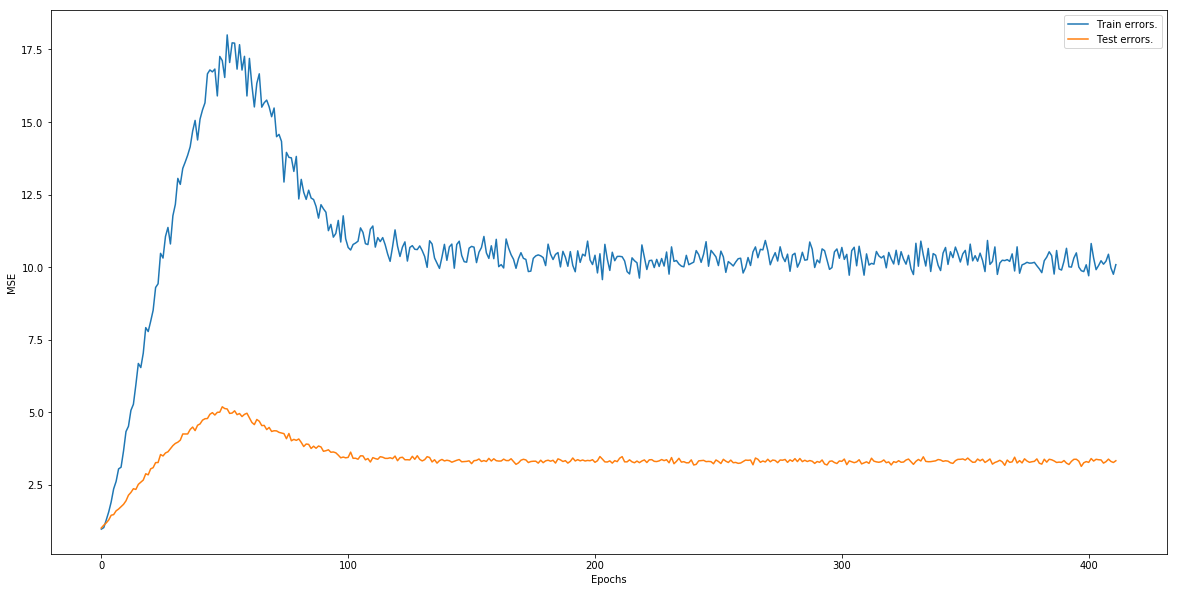

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
_ = plt.figure(figsize=(20, 10))
plt.plot(auto_encoder.verificatable_result.logs_df.train_loss.values, label="Train errors.")
plt.plot(auto_encoder.verificatable_result.logs_df.test_loss.values, label="Test errors.")
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Epochs")
plt.show()
plt.close()